# Data :


# Algo :

1] Import the necessary libraries.

2] Load the winequality-red.csv dataset using pandas' read_csv function.

3] Split the data into features (X) and target (y) variables.

4] Use the train_test_split function from scikit-learn to split the data into training and test sets.

5] Initialize an instance of the GradientBoostingClassifier using the default parameters.

6] Fit the classifier to the training data using the fit method.

In [1]:
# Import the necessary libraries
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
# load the data
data = pd.read_csv("winequality-red.csv")


In [3]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
# split the data into training and test sets
X = data.drop("quality", axis=1)
y = data["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [5]:
# initialize and train the classifier
gbt = GradientBoostingClassifier()
gbt.fit(X_train, y_train)


GradientBoostingClassifier()

In [6]:
# make predictions on the test set
y_pred = gbt.predict(X_test)



In [9]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')

print("Accuracy Score ",acc)
print("Recall Score",recall)
print("Precision Score",precision)

Accuracy Score  0.615625
Recall Score 0.32011877011877016
Precision Score 0.35958963658494175


In [7]:
from sklearn.metrics import confusion_matrix

# make predictions on the test set
y_pred = gbt.predict(X_test)

# create confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

print(conf_mat)


[[ 0  0  1  0  0  0]
 [ 0  1  6  3  0  0]
 [ 1  1 96 31  1  0]
 [ 1  1 38 80 11  1]
 [ 0  0  1 20 20  1]
 [ 0  0  0  1  4  0]]


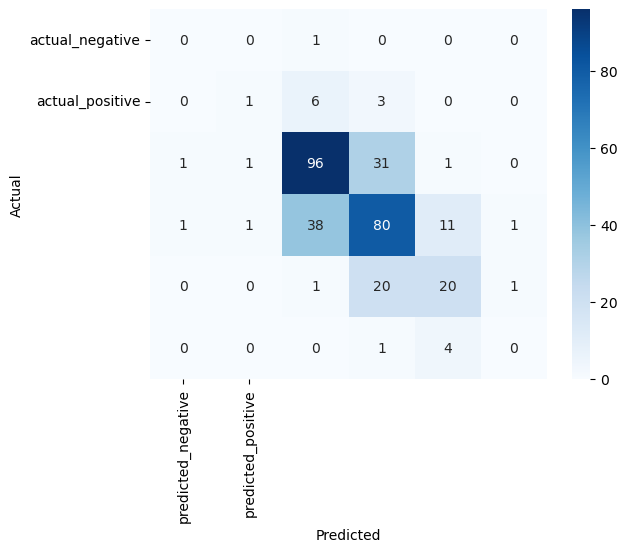

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d', 
            xticklabels=['predicted_negative', 'predicted_positive'], 
            yticklabels=['actual_negative', 'actual_positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
